In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [45]:
data = pd.read_csv('iris.csv')

In [46]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [47]:
X = data.drop("species",axis=1)
Y = data["species"]

In [48]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [50]:
X_scaled = StandardScaler().fit_transform(X)

In [51]:
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [52]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]
values,vectors = np.linalg.eig(cov_matrix)
values[:5]
vectors[:5]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

explained_variances are : [72.96244541329992, 22.85076178670171, 3.6689218892828683, 0.517870910715499]


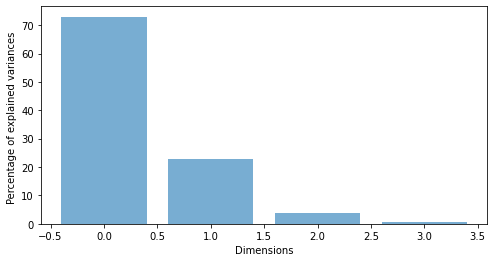

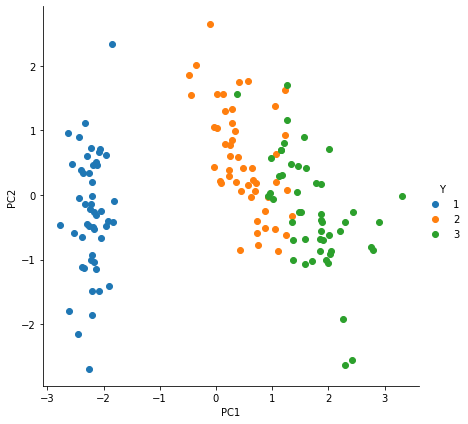

In [53]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values)*100)
print("explained_variances are :",explained_variances)

plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances,alpha=0.6)
plt.ylabel("Percentage of explained variances ")
plt.xlabel("Dimensions")

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])   
res['PC2']=projected_2
res['Y']=Y
res.head()

sns.FacetGrid(res,hue='Y',height = 6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()



explained_variances are : [72.96244541329992, 22.85076178670171, 3.6689218892828683, 0.517870910715499]


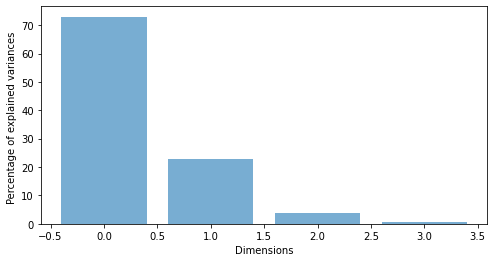

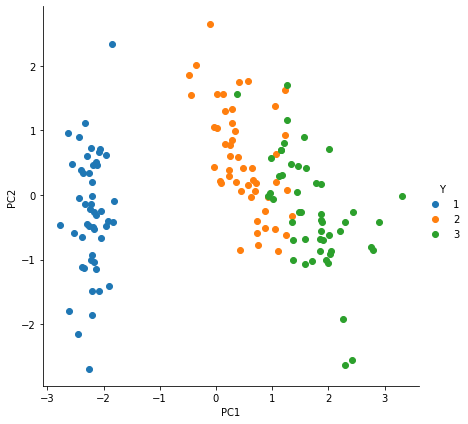

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('iris.csv')

data.head()

X = data.drop("species",axis=1)
Y = data["species"]

X

Y

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]
values,vectors = np.linalg.eig(cov_matrix)
values[:5]
vectors[:5]

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values)*100)
print("explained_variances are :",explained_variances)

plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances,alpha=0.6)
plt.ylabel("Percentage of explained variances ")
plt.xlabel("Dimensions")

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])   
res['PC2']=projected_2
res['Y']=Y
res.head()

sns.FacetGrid(res,hue='Y',height = 6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

